- 어머니 약혼자와 함께 1등실에 탐승한 17세 여성의 생존 확률은 얼마인가?
- 부모 형제 없이 혼자 3등실에 탑승한 19세 남성의 생존 확률은 얼마인가?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_excel('data/titanic.xlsx')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Passengerld : 탑승자 번호
- Survived : 생존 여부
- Pclass : 선실 등급
- Age : 나이
- Sibsp : 함께 탑승한 형제자매나 배우자의 수
- parch : 합께 탑승한 부모나 자녀의 수
- fare : 탑승 당시의 요금

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


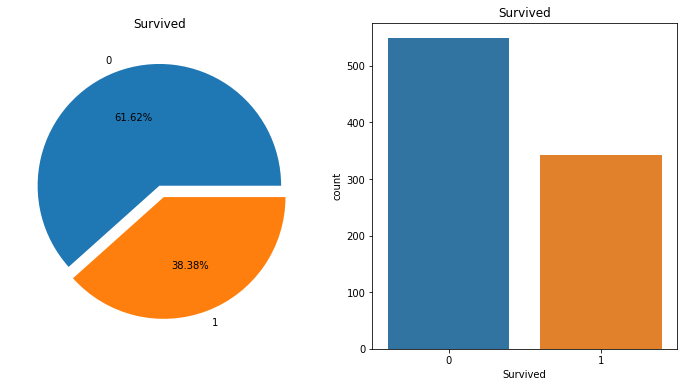

In [5]:
fig ,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

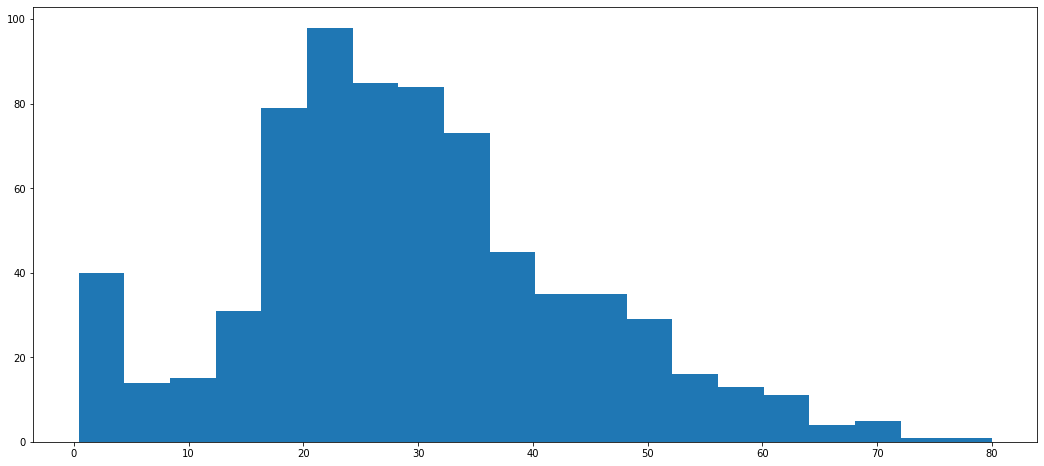

In [6]:
raw_data['Age'].hist(bins=20,figsize=(18,8),grid=False);

In [7]:
raw_data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [8]:
raw_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


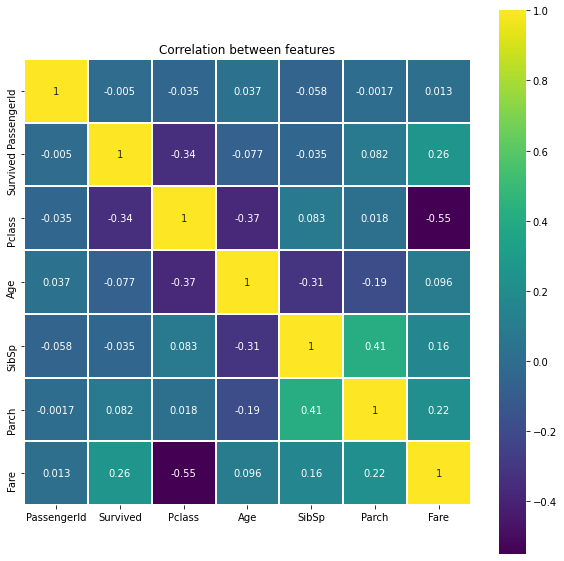

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

- 나이별 및 성별 생존율

In [10]:
raw_data['age_cat'] = pd.cut(raw_data['Age'], 
                             bins=[0, 3, 7, 15, 30, 60, 100], 
                             include_lowest=True, 
                             labels=['baby', 'children', 'teenage', 
                                     'young', 'adult', 'old'])
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [11]:
raw_data.groupby('age_cat').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
age_cat,,,,,,,
baby,396.700000,0.666667,2.533333,1.672333,1.733333,1.366667,33.364307
children,466.700000,0.700000,2.650000,4.950000,1.750000,1.350000,27.905830
teenage,442.060606,0.454545,2.696970,11.500000,1.727273,1.121212,35.217430
young,435.058282,0.358896,2.426380,23.262270,0.355828,0.263804,28.015413
adult,470.388693,0.420495,1.954064,41.132509,0.363958,0.392226,42.429225
old,432.545455,0.227273,1.590909,66.022727,0.136364,0.272727,41.371214


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


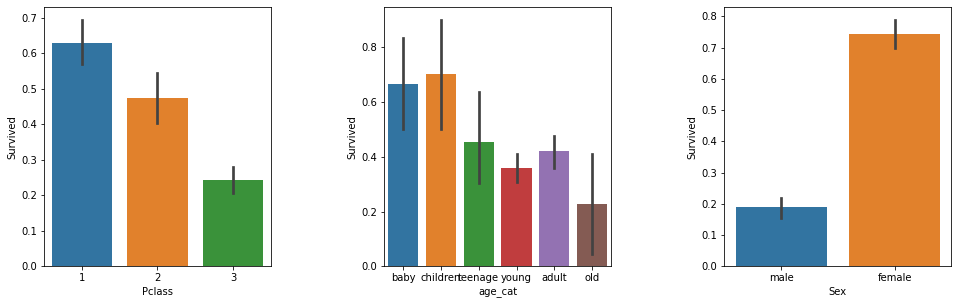

In [12]:
plt.figure(figsize=[14,4])
plt.subplot(1,3,1)
sns.barplot('Pclass', 'Survived', data=raw_data)
plt.subplot(1,3,2)
sns.barplot('age_cat', 'Survived', data=raw_data)
plt.subplot(1,3,3)
sns.barplot('Sex', 'Survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


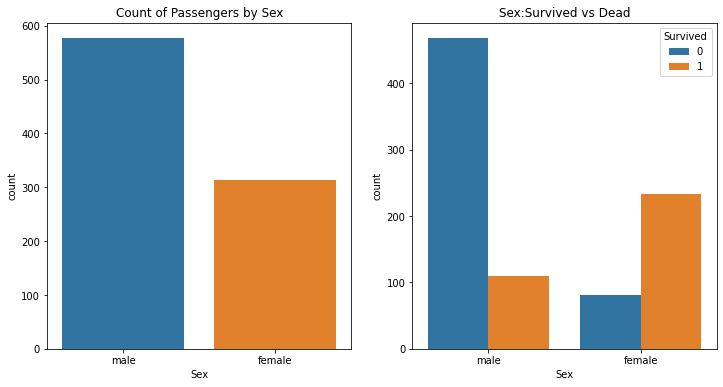

In [13]:
fig, ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('Sex',data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('Sex',hue='Survived',data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- 귀족들의 생존율

In [14]:
raw_data['Name'][0]

'Braund, Mr. Owen Harris'

In [15]:
raw_data['Name'][0].split(',')[1]

' Mr. Owen Harris'

In [16]:
raw_data['Name'][0].split(',')[1].split(',')[0]

' Mr. Owen Harris'

In [17]:
raw_data['Name'][0].split(',')[1].split('.')[0].strip()

'Mr'

# 람다함수

In [18]:
def test_func(v):
    return v+2

test_func(2)

4

In [19]:
test = lambda x: x+2
test(2)

4

In [20]:
list(map(test, range(5)))

[2, 3, 4, 5, 6]

In [21]:
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
raw_data['title'] = raw_data['Name'].map(conversion_rare)

titles = raw_data['title'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [22]:
pd.crosstab(raw_data['title'], raw_data['Sex'])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [23]:
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')

Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

for each in Rare:
    raw_data['title'] = raw_data['title'].replace(each, 'Rare')
    
raw_data['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Rare'], dtype=object)

In [24]:
print (raw_data[['title', 'Survived']].groupby(['title'], as_index=False).mean())

  title  Survived
0  Miss  0.702703
1    Mr  0.156673
2   Mrs  0.793651
3  Rare  0.492063


# 인공지능 학습

In [25]:
raw_data = pd.read_excel('data/titanic.xlsx')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
tmp = []
for each in raw_data['Sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)

In [27]:
raw_data['Sex'] = tmp
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [28]:
raw_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [30]:
raw_data = raw_data[raw_data["Age"].notna()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 72.5+ KB


In [31]:
raw_data['Survived'] = raw_data['Survived'].astype('float')
raw_data['Pclass'] = raw_data['Pclass'].astype('float')
raw_data['Sex'] = raw_data['Sex'].astype('float')
raw_data['SibSp'] = raw_data['SibSp'].astype('float')
raw_data['Parch'] = raw_data['Parch'].astype('float')
raw_data['Fare'] = raw_data['Fare'].astype('float')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,NaN,S


In [32]:
aw_data = raw_data[raw_data['Age'].notnull()]
raw_data = raw_data[raw_data['SibSp'].notnull()]
raw_data = raw_data[raw_data['Parch'].notnull()]
raw_data = raw_data[raw_data['Fare'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    float64
 2   Pclass       714 non-null    float64
 3   Name         714 non-null    object 
 4   Sex          714 non-null    float64
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    float64
 7   Parch        714 non-null    float64
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 72.5+ KB


# 생존자 예측을 위한 모델 수립

In [33]:
train_pre = raw_data[['Pclass','Sex','Age','SibSp','Parch','Fare']]
train_pre.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,35.0,1.0,0.0,53.1000
4,3.0,1.0,35.0,0.0,0.0,8.0500


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pre, 
                                                    raw_data[['Survived']], 
                                                    test_size=3, 
                                                    random_state=13)

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 787 to 422
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  711 non-null    float64
 1   Sex     711 non-null    float64
 2   Age     711 non-null    float64
 3   SibSp   711 non-null    float64
 4   Parch   711 non-null    float64
 5   Fare    711 non-null    float64
dtypes: float64(6)
memory usage: 38.9 KB


In [62]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 769 to 875
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  3 non-null      float64
 1   Sex     3 non-null      float64
 2   Age     3 non-null      float64
 3   SibSp   3 non-null      float64
 4   Parch   3 non-null      float64
 5   Fare    3 non-null      float64
dtypes: float64(6)
memory usage: 168.0 bytes


In [63]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 787 to 422
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  711 non-null    float64
dtypes: float64(1)
memory usage: 11.1 KB


In [64]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 769 to 875
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  3 non-null      float64
dtypes: float64(1)
memory usage: 48.0 bytes


In [65]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
787,3.0,1.0,8.0,4.0,1.0,29.1250
289,3.0,0.0,22.0,0.0,0.0,7.7500
876,3.0,1.0,20.0,0.0,0.0,9.8458
456,1.0,1.0,65.0,0.0,0.0,26.5500
75,3.0,1.0,25.0,0.0,0.0,7.6500


In [66]:
y_train

,Survived
787,0.0
289,1.0
876,0.0
456,0.0
75,0.0
...,...
192,1.0
668,0.0
96,0.0
219,0.0


In [67]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [75]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.8241912798874824


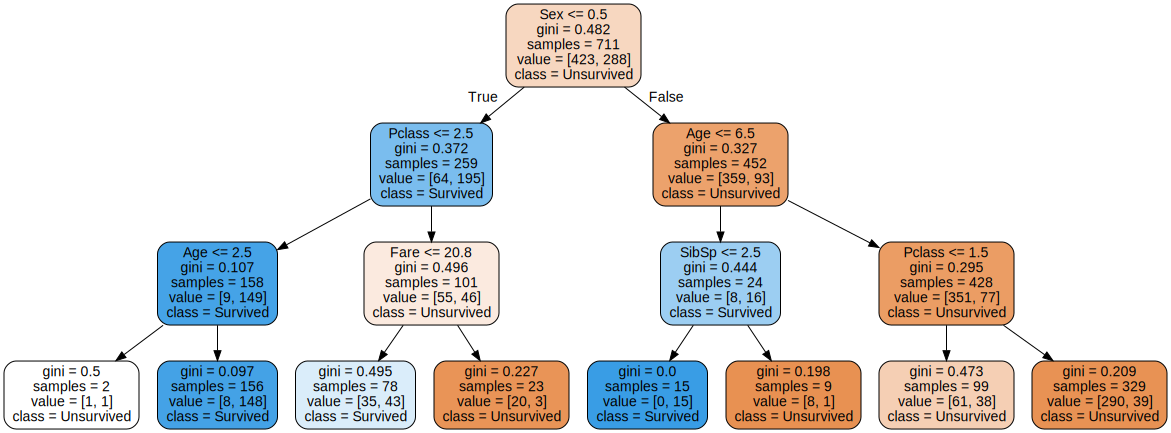

In [76]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="titanic.dot",
        feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='decision_trees', cleanup=True)
dot

In [77]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Test Accuracy is  100.0


# 생존자 예측

In [71]:
# pclass, sex, age, sibsp, parch, fare
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]

In [72]:
tree_clf.predict_proba([winslet])

array([[0., 1.]])

In [73]:
tree_clf.predict_proba([dicaprio])

array([[1., 0.]])

In [74]:
def isSurvived(name, person):
    isSurvive = 'not survived' if tree_clf.predict([person])[0] == 0 else 'survived'
    print(name, ' is ', isSurvive, 
          ' --> ', max(tree_clf.predict_proba([person])[0]))
    
isSurvived('Dicaprio', dicaprio)
isSurvived('Winslet', winslet)

Dicaprio  is  not survived  -->  1.0
Winslet  is  survived  -->  1.0
